# COURSE: A deep understanding of deep learning
## SECTION: Metaparameters (activation, batch, optimizers)
### LECTURE: The "wine quality" dataset
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [33]:
### import libraries

# for DL modeling
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import and process the data

In [34]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url,sep=';')

In [35]:
### z-score all variables except for quality

# find the columns we want to normalize (all except quality)
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')

# z-score (written out for clarity)
# for col in cols2zscore:
#   meanval   = np.mean(data[col])
#   stdev     = np.std(data[col],ddof=1)
#   data[col] = (data[col]-meanval) / stdev

# can also do more compactly
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)
data['boolQuality'] = 0
data['boolQuality'][data['quality']>5] = 1

data.describe()

C:\Users\Zlswo\AppData\Local\Temp\ipykernel_36468\3108037610.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['boolQuality'][data['quality']>5] = 1
C:\Users\Zlswo\AppData\Local\Temp\ipykernel_36468\3108037610.py:16: SettingWithCopyW

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,boolQuality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000,1599.000000
mean,3.554936e-16,1.733031e-16,-8.887339e-17,-1.244227e-16,3.732682e-16,-6.221137e-17,4.443669e-17,-3.473172e-14,2.861723e-15,6.754377e-16,1.066481e-16,5.636023,0.534709
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,0.807569,0.498950
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00,3.000000,0.000000
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01,5.000000,0.000000
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01,6.000000,1.000000
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01,6.000000,1.000000
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00,8.000000,1.000000


In [36]:
# a function that creates the ANN model

def createANewModel():

  # model architecture
  ANNiris = nn.Sequential(
      nn.Linear(11,32),   # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(32,32),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(32,1),   # output units
      #nn.Softmax(dim=1), # final activation unit (you probably don't need more reminders that this is just conceptual ;)  )
        )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.001)

  return ANNiris,lossfun,optimizer

# Re-organize the data: train/test in DataLoaders

In [37]:
# convert from pandas dataframe to tensor
dataT  = torch.tensor( data[cols2zscore].values ).float()
labels = torch.tensor( data['boolQuality'].values ).float()

print( dataT.shape )
print( labels.shape )

# we'll actually need the labels to be a "tensor"
labels = labels[:,None]
print( labels.shape )

torch.Size([1599, 11])
torch.Size([1599])
torch.Size([1599, 1])


In [38]:
# global parameter
numepochs = 50

# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labels, test_size=.1)


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_dataDataset = TensorDataset(train_data,train_labels)
test_dataDataset  = TensorDataset(test_data,test_labels)


# finally, translate into dataloader objects
batchsize    = 2 ** np.arange(1,7)

# initialize output results matrices
accuracyResultsTrain = np.zeros((numepochs,len(batchsize)))
accuracyResultsTest  = np.zeros((numepochs,len(batchsize)))

# train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True, drop_last=True)
test_loader  = DataLoader(test_dataDataset,batch_size=test_dataDataset.tensors[0].shape[0])


In [39]:


def trainTheModel():

  # initialize accuracies as empties
  trainAcc = []
  testAcc  = []
  losses   = torch.zeros(numepochs)

  # loop over epochs
  for epochi in range(numepochs):

    # activate training mode
    ANNiris.train()

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = ANNiris(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # compute training accuracy just for this batch
      # print(f'Batchacc is {batchAcc}')
      # print(f'Batchloss is {batchLoss}')
      batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
      batchLoss.append( loss.item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )
    losses[epochi] = ( np.mean(batchLoss) )




    ### test accuracy

    # extract X,y from test dataloader
    X,y, = next(iter(test_loader))

    # activate testing mode
    ANNiris.eval()
    with torch.no_grad():
      predlabels = torch.argmax( ANNiris(X),axis=1 )

    # compute accuracy
    testAcc.append( 100*torch.mean((predlabels == y).float()).item() )

  # function output
  return trainAcc,testAcc,losses

In [40]:
# loop over batch sizes
for bi in range(len(batchsize)):

  # create dataloader object
  train_loader = DataLoader(train_dataDataset,
                          batch_size=int(batchsize[bi]), shuffle=True, drop_last=True)

  # create and train a model
  ANNiris,lossfun,optimizer = createANewModel()
  trainAcc,testAcc,losses = trainTheModel()

  print(f'Train acc is {trainAcc}')
  print(f'Test acc is {trainAcc}')

  # store results
  accuracyResultsTrain[:,bi] = trainAcc
  accuracyResultsTest[:,bi]  = testAcc

Train acc is [46.522948539638385, 46.59248956884562, 46.522948539638385, 46.59248956884562, 46.522948539638385, 46.522948539638385, 46.59248956884562, 46.59248956884562, 46.522948539638385, 46.59248956884562, 46.522948539638385, 46.522948539638385, 46.59248956884562, 46.59248956884562, 46.59248956884562, 46.59248956884562, 46.522948539638385, 46.522948539638385, 46.522948539638385, 46.59248956884562, 46.59248956884562, 46.522948539638385, 46.59248956884562, 46.59248956884562, 46.59248956884562, 46.522948539638385, 46.522948539638385, 46.59248956884562, 46.522948539638385, 46.522948539638385, 46.522948539638385, 46.522948539638385, 46.522948539638385, 46.522948539638385, 46.59248956884562, 46.522948539638385, 46.522948539638385, 46.522948539638385, 46.522948539638385, 46.522948539638385, 46.522948539638385, 46.522948539638385, 46.522948539638385, 46.59248956884562, 46.59248956884562, 46.522948539638385, 46.59248956884562, 46.59248956884562, 46.59248956884562, 46.59248956884562]
Test acc

In [41]:
# check sizes of data batches
for X,y in train_loader:
  print(X.shape,y.shape)

# go back and set drop_last=True in training DataLoader

torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])


Text(0.5, 1.0, 'Test Acc with minibatch size=[ 2  4  8 16 32 64]')

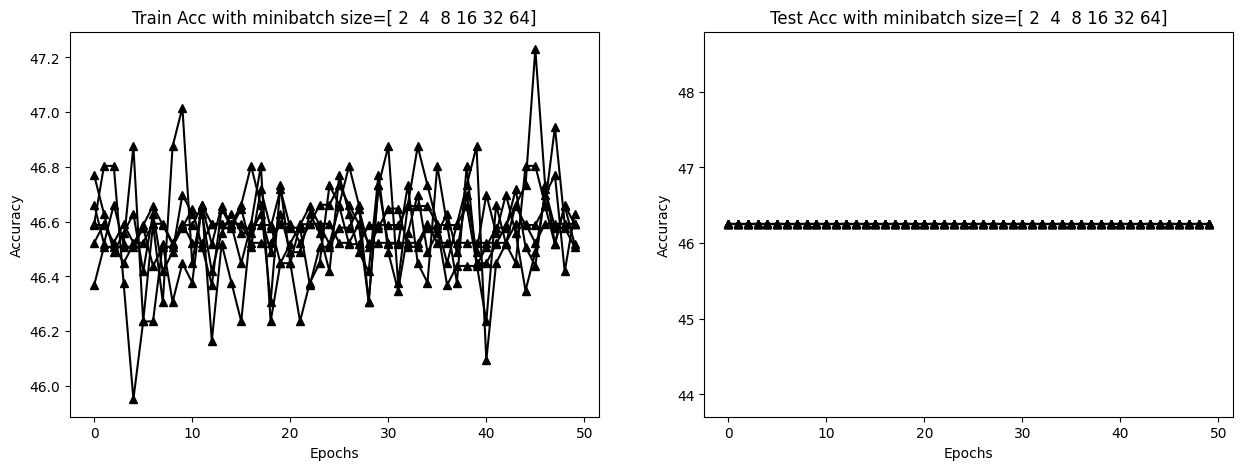

In [42]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(accuracyResultsTrain,'k^-')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Train Acc with minibatch size=' + str(batchsize))


ax[1].plot(accuracyResultsTest,'k^-')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_title('Test Acc with minibatch size=' + str(batchsize))



(27.0, 103.0)

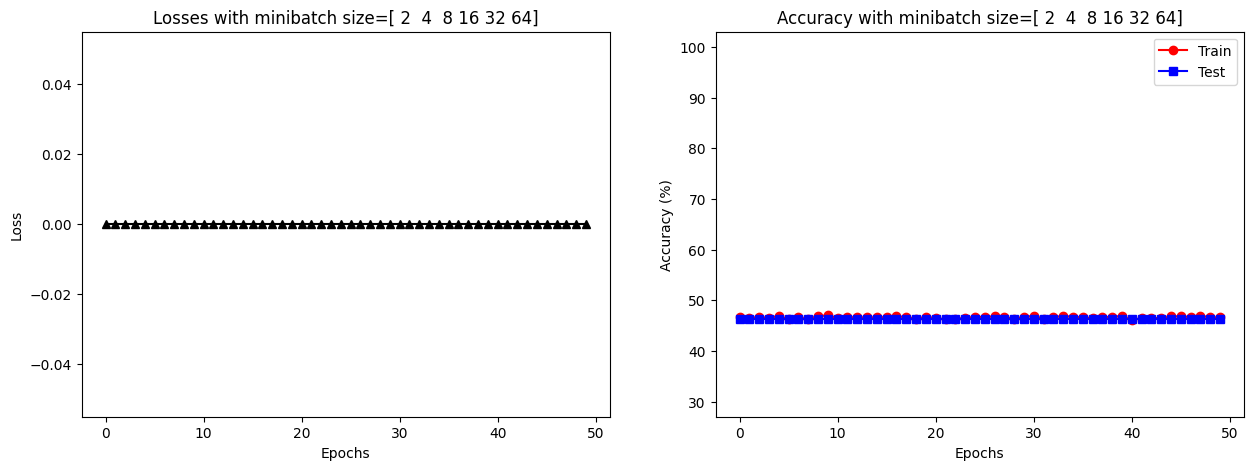

In [43]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(15,5))


ax[0].plot(losses,'k^-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses with minibatch size=' + str(batchsize))

ax[1].plot(trainAcc,'ro-')
ax[1].plot(testAcc,'bs-')
ax[1].set_title('Accuracy with minibatch size=' + str(batchsize))
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(['Train','Test'])
ax[1].set_ylim([27,103])